In [1]:
import pandas as pd
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

In [2]:
%matplotlib inline
#adjusting the configuration of the plots
matplotlib.rcParams['figure.figsize']=(12,8)

In [3]:
#reading data
df=pd.read_csv('movies.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [6]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [7]:
df.shape

(7668, 15)

In [8]:
import numpy as np
#looking for missing data in each column
for col in df.columns:
    missing_val_percnt=np.mean(df[col].isnull())
    print('{} - {}%'.format(col,missing_val_percnt))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


Very less amount of data is missing in each column

In [9]:
year_mean=df['year'].mean()
votes_mean=df['votes'].mean()
score_mean=df['score'].mean()
budget_mean=df['budget'].mean()
gross_mean=df['gross'].mean()
runtime_mean=df['runtime'].mean()


In [10]:
#filling NaN values with mean to respected numerical columns
df['year'].fillna(value=year_mean, inplace=True)
df['votes'].fillna(value=votes_mean, inplace=True)
df['score'].fillna(value=score_mean, inplace=True)
df['budget'].fillna(value=budget_mean, inplace=True)
df['gross'].fillna(value=gross_mean, inplace=True)
df['runtime'].fillna(value=runtime_mean, inplace=True)

In [11]:
# for non numerical columns, trying to fill NaN with most repeated values
rating_md=df['rating'].mode().values[0]
released_md=df['released'].mode().values[0]
writer_md=df['writer'].mode().values[0]
star_md=df['star'].mode().values[0]
country_md=df['country'].mode().values[0]
company_md=df['company'].mode().values[0]
df['rating'].fillna(value=rating_md, inplace=True)
df['released'].fillna(value=released_md, inplace=True)
df['writer'].fillna(value=writer_md, inplace=True)
df['star'].fillna(value=star_md, inplace=True)
df['country'].fillna(value=country_md, inplace=True)
df['company'].fillna(value=company_md, inplace=True)

### Data Cleaning

In [12]:
#Checking the data types of each column
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [13]:
df['budget']=df['budget'].astype('int64') #changing data type for columns to take out the decimal value
df['votes']=df['votes'].astype('int64')
df['gross']=df['gross'].astype('int64')
df['runtime']=df['runtime'].astype('int64')

In [14]:
#creating correct year column using regular expression
df['corrected_year'] = df['released'].str.extract(r'(\d{4})')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,corrected_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.400000,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.800000,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.700000,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.700000,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.300000,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,R,Drama,2020,"October 23, 2020 (United States)",3.100000,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,78500541,Universal Pictures,90,2020
7664,Dream Round,R,Comedy,2020,"February 7, 2020 (United States)",4.700000,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,35589876,78500541,Cactus Blue Entertainment,90,2020
7665,Saving Mbango,R,Drama,2020,"April 27, 2020 (Cameroon)",5.700000,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,78500541,Embi Productions,107,2020
7666,It's Just Us,R,Drama,2020,"October 1, 2020 (United States)",6.390411,88108,James Randall,James Randall,Christina Roz,United States,15000,78500541,Universal Pictures,120,2020


In [15]:
df['corrected_year']=df['corrected_year'].astype('int64')


In [16]:
# Comparing 'corrected_year' and 'year' columns and checking if there are any False values
are_equal = (df['corrected_year'] == df['year']).all()

# Print the result
print("Are all values equal? ", are_equal)

Are all values equal?  False


In [17]:
df.sort_values(by=['gross'],inplace=False,ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,corrected_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,35589876,1400,British Broadcasting Corporation (BBC),103,2001
7625,The Untold Story,R,Comedy,2019,"January 11, 2019 (United States)",5.7,320,Shane Stanley,Lee Stanley,Miko Hughes,United States,35589876,790,Visual Arts Entertainment,104,2019
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735,John Swab,John Swab,Ron Perlman,United States,35589876,682,Roxwell Films,93,2020
2417,Madadayo,R,Drama,1993,"April 17, 1993 (Japan)",7.3,5100,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134,1993


In [18]:
#pd.set_option('display.max_rows',None) #to display all the rows

In [19]:
df.sort_values(by=['gross'],inplace=False,ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,corrected_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,35589876,1400,British Broadcasting Corporation (BBC),103,2001
7625,The Untold Story,R,Comedy,2019,"January 11, 2019 (United States)",5.7,320,Shane Stanley,Lee Stanley,Miko Hughes,United States,35589876,790,Visual Arts Entertainment,104,2019
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735,John Swab,John Swab,Ron Perlman,United States,35589876,682,Roxwell Films,93,2020
2417,Madadayo,R,Drama,1993,"April 17, 1993 (Japan)",7.3,5100,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134,1993


In [20]:
df['name'].sort_values(ascending=True)

6569                           '71
1006               'Round Midnight
1013                'night, Mother
1099       *batteries not included
6906           10 Cloverfield Lane
                   ...            
3503                      eXistenZ
4083                           xXx
7112    xXx: Return of Xander Cage
4761       xXx: State of the Union
4722                      Æon Flux
Name: name, Length: 7668, dtype: object

In [21]:
df.drop_duplicates() #dropping duplicate values

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,corrected_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.400000,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.800000,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.700000,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.700000,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.300000,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,R,Drama,2020,"October 23, 2020 (United States)",3.100000,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,78500541,Universal Pictures,90,2020
7664,Dream Round,R,Comedy,2020,"February 7, 2020 (United States)",4.700000,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,35589876,78500541,Cactus Blue Entertainment,90,2020
7665,Saving Mbango,R,Drama,2020,"April 27, 2020 (Cameroon)",5.700000,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,78500541,Embi Productions,107,2020
7666,It's Just Us,R,Drama,2020,"October 1, 2020 (United States)",6.390411,88108,James Randall,James Randall,Christina Roz,United States,15000,78500541,Universal Pictures,120,2020


 Looks like there's only one duplicate value

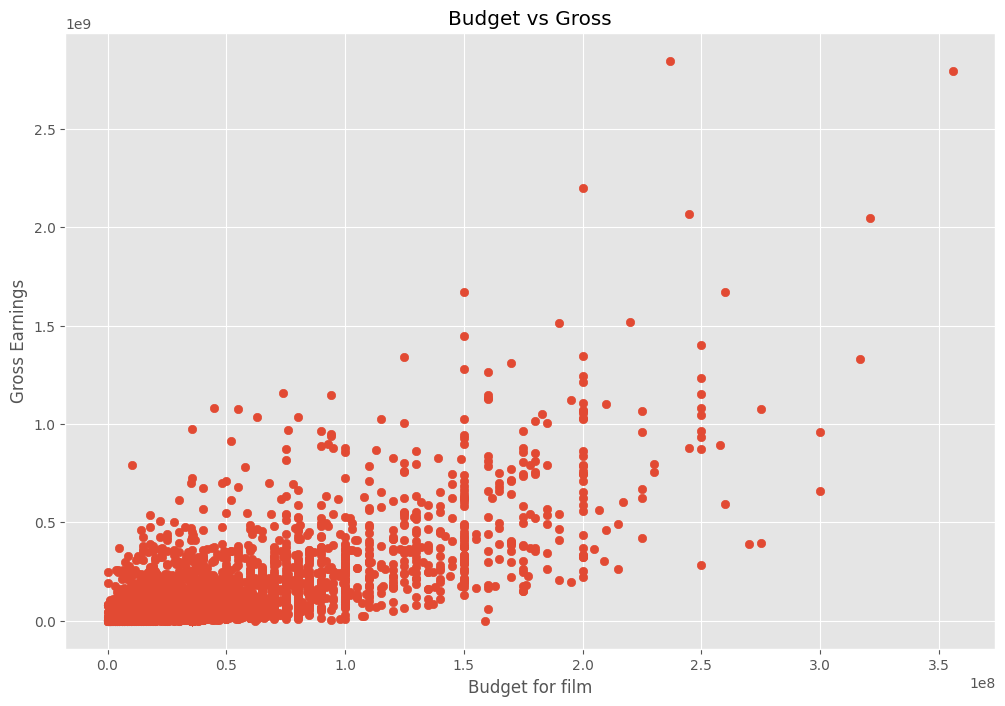

In [22]:
#scatter plot on budget vs gross
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross')
plt.xlabel('Budget for film')
plt.ylabel('Gross Earnings')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

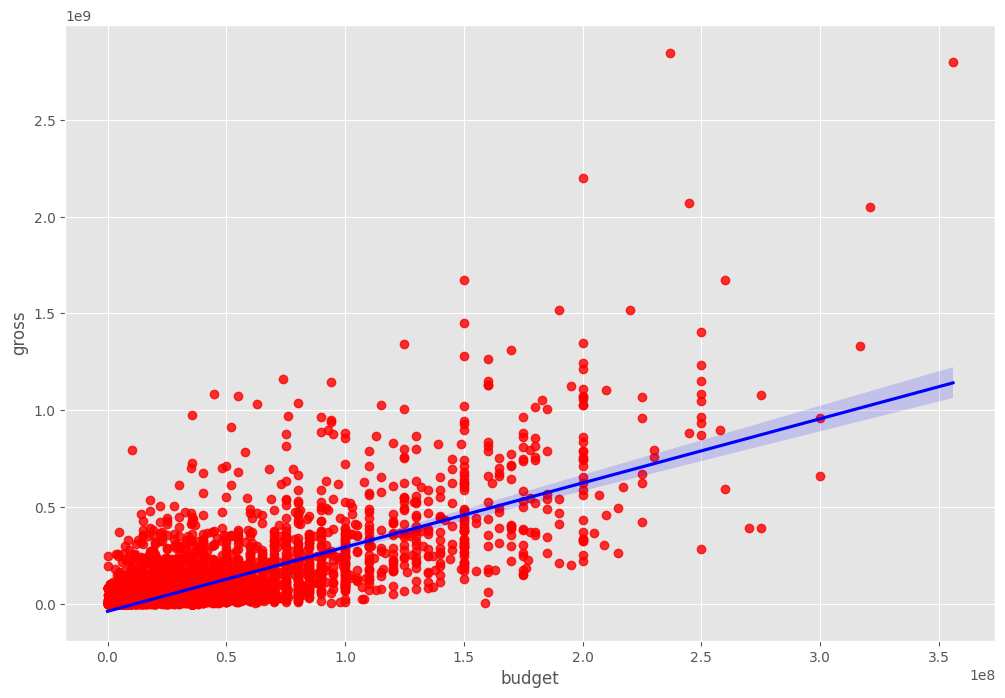

In [23]:
# plotting budget vs gross using seaborn
sns.regplot(x='budget',y='gross',data=df,scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [24]:
# looking for correlation
df.dtypes

name               object
rating             object
genre              object
year                int64
released           object
score             float64
votes               int64
director           object
writer             object
star               object
country            object
budget              int64
gross               int64
company            object
runtime             int64
corrected_year      int64
dtype: object

In [25]:
df_corr=df[['budget','gross','runtime','score','votes','year']] #taking numerical columns to a new dataframe

In [26]:
df_corr.corr() #correlation analysis on the data frame

,budget,gross,runtime,score,votes,year
budget,1.000000,0.711270,0.265289,0.064541,0.421007,0.265578
gross,0.711270,1.000000,0.241336,0.182868,0.628713,0.252042
runtime,0.265289,0.241336,1.000000,0.399335,0.309168,0.120758
score,0.064541,0.182868,0.399335,1.000000,0.409182,0.097936
votes,0.421007,0.628713,0.309168,0.409182,1.000000,0.222810
year,0.265578,0.252042,0.120758,0.097936,0.222810,1.000000


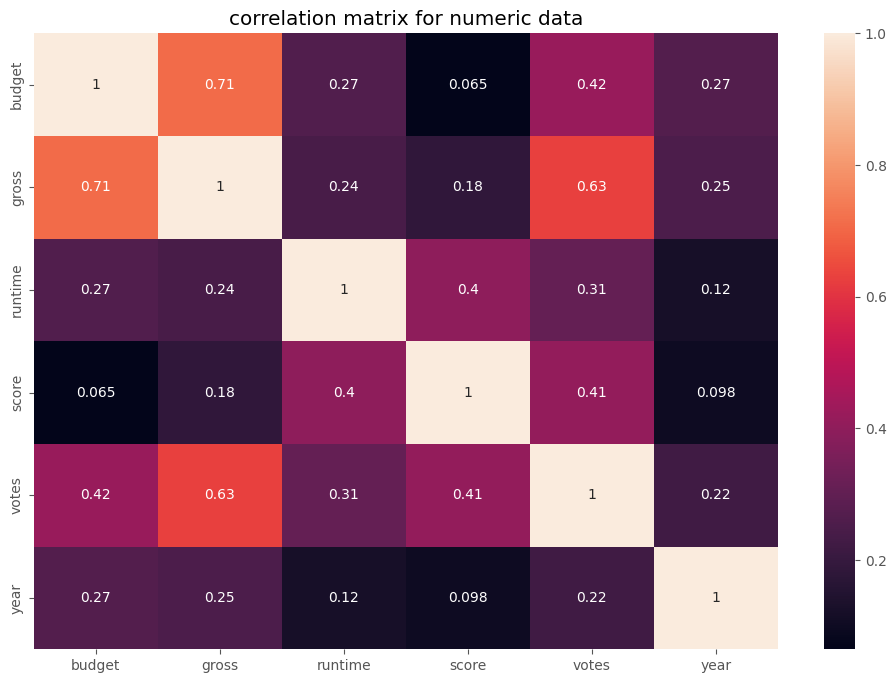

In [27]:
# visualizing the correlation matrix
corr_matrix=df_corr.corr(method='pearson')
sns.heatmap(corr_matrix,annot=True)
plt.title('correlation matrix for numeric data')
plt.show()

In [28]:
# converting object features into catergorical representation
df_numerized=df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype=='object'):
        df_numerized[col_name]=df_numerized[col_name].astype('category')
        df_numerized[col_name]=df_numerized[col_name].cat.codes
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,corrected_year
0,6587,6,6,1980,1705,8.4,927000,2589,4014,1047,54,19000000,46998772,2319,146,1980
1,5573,6,1,1980,1492,5.8,65000,2269,1632,327,55,4500000,58853106,731,104,1980
2,5142,4,0,1980,1771,8.7,1200000,1111,2567,1745,55,18000000,538375067,1540,124,1980
3,286,4,4,1980,1492,7.7,221000,1301,2000,2246,55,3500000,83453539,1812,88,1980
4,1027,6,4,1980,1543,7.3,108000,1054,521,410,55,6000000,39846344,1777,98,1980


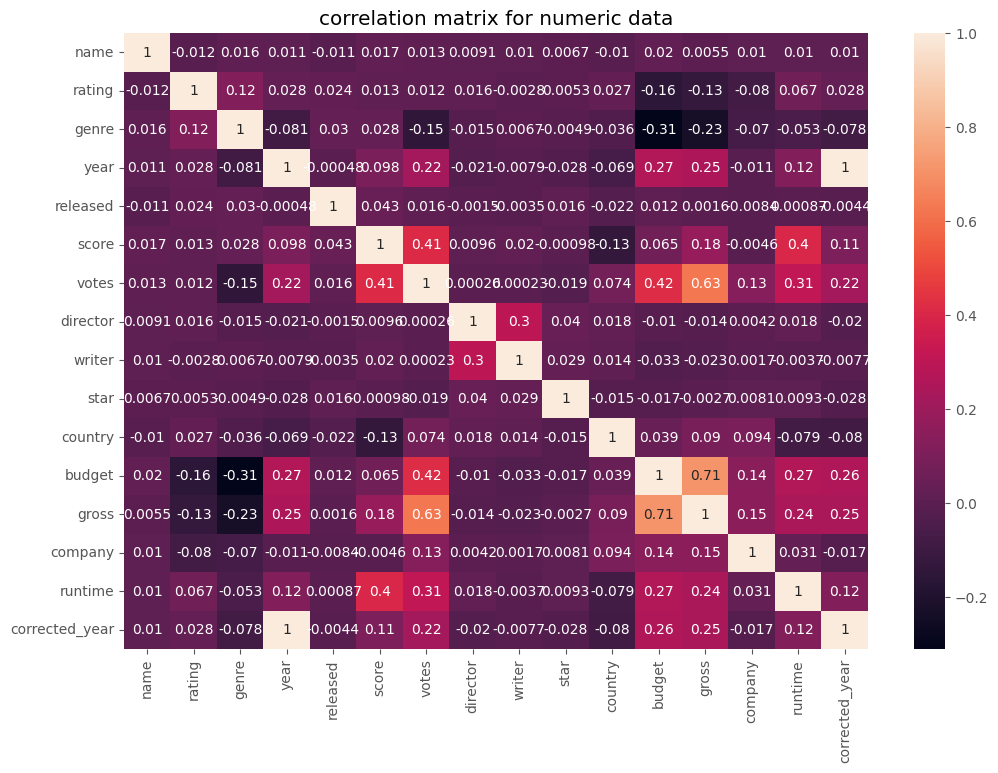

In [29]:
# visualizing the correlation matrix
corr_matrix=df_numerized.corr(method='pearson')
sns.heatmap(corr_matrix,annot=True)
plt.title('correlation matrix for numeric data')
plt.show()

In [30]:
corr_matrix=df_numerized.corr()
corr_pairs=corr_matrix.unstack()
sorted_matrix=corr_pairs.sort_values()
high_corr=sorted_matrix[(sorted_matrix)>0.5]

In [31]:
high_corr

votes           gross             0.628713
gross           votes             0.628713
budget          gross             0.711270
gross           budget            0.711270
corrected_year  year              0.996802
year            corrected_year    0.996802
name            name              1.000000
company         company           1.000000
gross           gross             1.000000
budget          budget            1.000000
country         country           1.000000
star            star              1.000000
writer          writer            1.000000
director        director          1.000000
votes           votes             1.000000
score           score             1.000000
released        released          1.000000
year            year              1.000000
genre           genre             1.000000
rating          rating            1.000000
runtime         runtime           1.000000
corrected_year  corrected_year    1.000000
dtype: float64

we can see that the votes & budget have the highest correlation to the gross earnings.
Genre has the low correlation to the gross earnings